# 2019/02/21    - test campaign 2, day 9

##    5.4 Optimize M1-M3-M1 figure using LSST bending modes and new baseline forces (4 iterations)
##    5.3 Optimize M3 figure using LSST bending modes 1-7 only with 25% horizon forces applied and correction forces calculated and applied by LSST (3 iterations, M1-M3-M1 measured)
##    4.10 Measure M1 and M3 before and after loosening actuators (4 actuators: 337, 114, 113, 411)
##    5.4 Optimize M1-M3-M1 figure using LSST bending modes (3 iterations)

In [1]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

%matplotlib inline
plt.jet()

dateID = 190221

<Figure size 432x288 with 0 Axes>

## Final push on surface optimization, with Bo calculating new forces in real time.
Force predictions utilized single actuator influence functions for 4 quads + 8 neighbors + 2 on M3 innner edge

5-4 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190221_5-4a/M1 set0 190221 5-4.h5: Thu Feb 21 08:44:35 2019 
/Processed/190221_5-4a/M3 set0 190221 5-4.h5: Thu Feb 21 08:45:35 2019 
5-4 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190221_5-4a/M1 set1 190221 5-4.h5: Thu Feb 21 09:08:29 2019 
/Processed/190221_5-4a/M3 set1 190221 5-4.h5: Thu Feb 21 09:08:09 2019 
==============Plot on the right is what we will call fa later===============


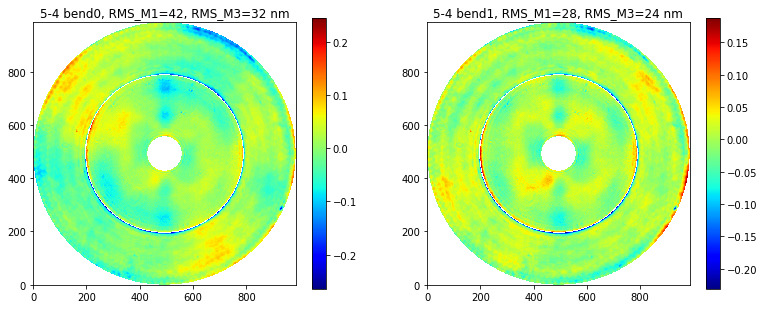

In [5]:
testID = '5-4'
iter = 'a'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(2):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
fig.delaxes(ax.flatten()[-1])    
print('==============Plot on the right is what we will call fa later===============')

/Users/bxin/largeData/M1M3_ML/Processed/190221_5-4a/M1M3 set0 190221 5-4M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190221_5-4a/M1M3 set1 190221 5-4M1M3 fit mode amps.csv


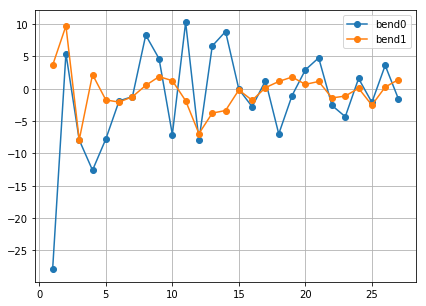

In [14]:
testID = '5-4'
iter = 'a'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(2):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 

5-4 bend2 ------ irow = 0, icol = 0, -----------------------------
/Processed/190221_5-4b/M1 set2 190221 5-4.h5: Thu Feb 21 10:06:27 2019 
/Processed/190221_5-4b/M3 set2 190221 5-4.h5: Thu Feb 21 10:07:53 2019 
==============This is what we will call fb later===============


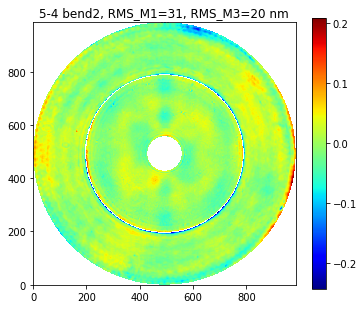

In [6]:
testID = '5-4'
iter = 'b'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(2, 3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
fig.delaxes(ax.flatten()[-2])  
fig.delaxes(ax.flatten()[-1])    
print('==============This is what we will call fb later===============')

/Users/bxin/largeData/M1M3_ML/Processed/190221_5-4b/M1M3 set2 190221 5-4M1M3 fit mode amps.csv


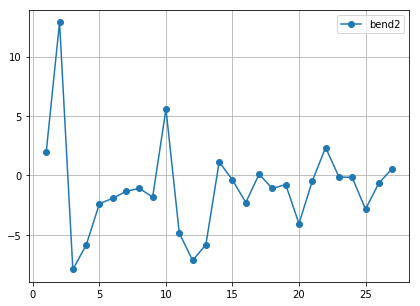

In [15]:
testID = '5-4'
iter = 'b'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(2,3):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 

5-4 bend2 ------ irow = 0, icol = 0, -----------------------------
/Processed/190221_5-4c/M1 set2 190221 5-4.h5: Thu Feb 21 10:06:27 2019 
5-4 bend3 ------ irow = 0, icol = 1, -----------------------------
/Processed/190221_5-4c/M1 set3 190221 5-4.h5: Thu Feb 21 10:36:10 2019 


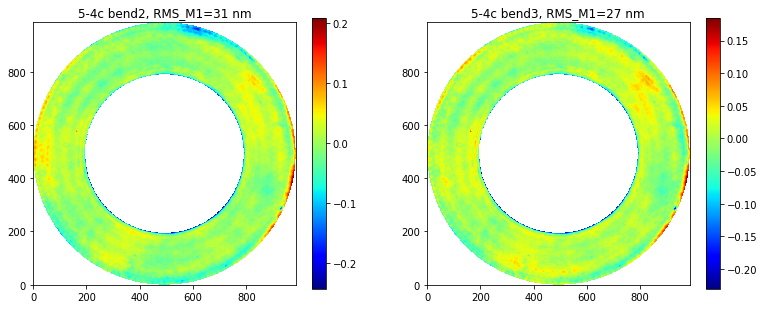

In [5]:
testID = '5-4'
iter = 'c'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(2, 4):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])

fig.delaxes(ax.flatten()[-1])    

/Users/bxin/largeData/M1M3_ML/Processed/190221_5-4c/M1 set2 190221 5-4 -FC fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190221_5-4c/M1 set3 190221 5-4 -FC fit mode amps.csv


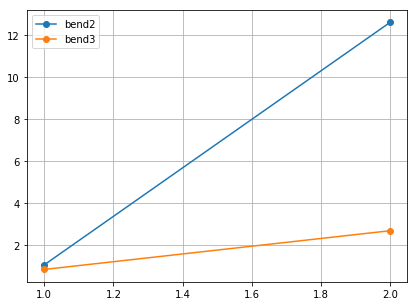

In [16]:
testID = '5-4'
iter = 'c'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(2,4):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 

5-4 bend3 ------ irow = 0, icol = 0, -----------------------------
/Processed/190221_5-4d/M1 set3 190221 5-4.h5: Thu Feb 21 10:36:10 2019 
/Processed/190221_5-4d/M3 set3 190221 5-4.h5: Thu Feb 21 10:36:54 2019 


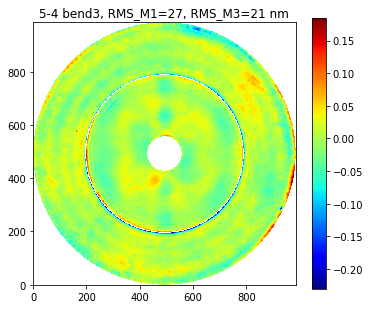

In [6]:
testID = '5-4'
iter = 'd'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(3, 4):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
fig.delaxes(ax.flatten()[-2])  
fig.delaxes(ax.flatten()[-1])    
print('==============This is what we will call fc later===============')

/Users/bxin/largeData/M1M3_ML/Processed/190221_5-4d/M1M3 set3 190221 5-4M1M3 fit mode amps.csv


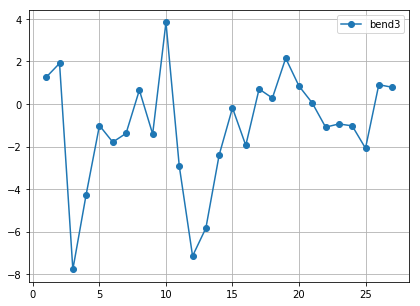

In [17]:
testID = '5-4'
iter = 'd'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(3,4):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 

### Actuator removal and re-installation. Measure surfaces before and after
Did this for 4 actuators. So 5 measurements.

4-10 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190221_4-10/190221 4-10 M1 set0-1 burst50 morph -.h5: Thu Feb 21 13:10:48 2019 
/Processed/190221_4-10/190221 4-10 M1 set0-2 burst50 morph -.h5: Thu Feb 21 13:23:46 2019 
/Processed/190221_4-10/190221 4-10 M3 set0-1 burst20 morph -.h5: Thu Feb 21 13:15:41 2019 
/Processed/190221_4-10/190221 4-10 M3 set0-2 burst20 morph -.h5: Thu Feb 21 13:17:10 2019 
4-10 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190221_4-10/190221 4-10 M1 set1-1 burst50 morph -.h5: Thu Feb 21 13:39:51 2019 
/Processed/190221_4-10/190221 4-10 M1 set1-2 burst50 morph -.h5: Thu Feb 21 13:54:20 2019 
/Processed/190221_4-10/190221 4-10 M3 set1-1 burst20 morph -.h5: Thu Feb 21 13:45:59 2019 
/Processed/190221_4-10/190221 4-10 M3 set1-2 burst20 morph -.h5: Thu Feb 21 13:47:15 2019 
4-10 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190221_4-10/190221 4-10 M1 set2-1 burst50 morph -.h5: Thu

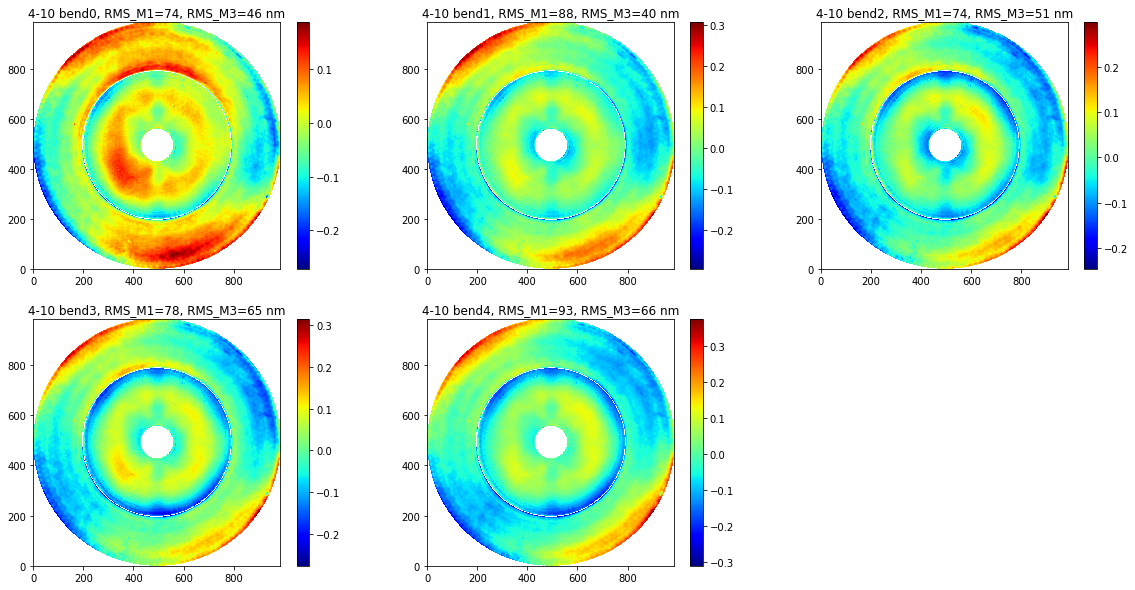

In [11]:
testID = '4-10'
iter = ''
fig, ax = plt.subplots(2,3,figsize=(20,5*2))
i = 0
for bend in range(5):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    if 1:
        fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 set%d-*morph -.h5'%(
            dataDir, dateID, testID, iter, dateID, testID, bend)))
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
        fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M3 set%d-*morph -.h5'%(
            dataDir, dateID, testID, iter, dateID, testID, bend)))
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(s, origin='lowerleft')  
        ax[irow][icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[irow][icol])
fig.delaxes(ax.flatten()[-1])    

### Four difference maps

4-10 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190221_4-10/Analysis/Combined M1M3 DiffMap set0-set1.h5: date not in h5 file. 
/Processed/190221_4-10/Analysis/Combined M1M3 DiffMap set0-set1.h5: date not in h5 file. 
4-10 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190221_4-10/Analysis/Combined M1M3 DiffMap set1-set2.h5: date not in h5 file. 
/Processed/190221_4-10/Analysis/Combined M1M3 DiffMap set1-set2.h5: date not in h5 file. 
4-10 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190221_4-10/Analysis/Combined M1M3 DiffMap set2-set3.h5: date not in h5 file. 
/Processed/190221_4-10/Analysis/Combined M1M3 DiffMap set2-set3.h5: date not in h5 file. 
4-10 bend3 ------ irow = 1, icol = 0, -----------------------------
/Processed/190221_4-10/Analysis/Combined M1M3 DiffMap set3-set4.h5: date not in h5 file. 
/Processed/190221_4-10/Analysis/Combined M1M3 DiffMap set3-set4.h5: date not in h5 file. 


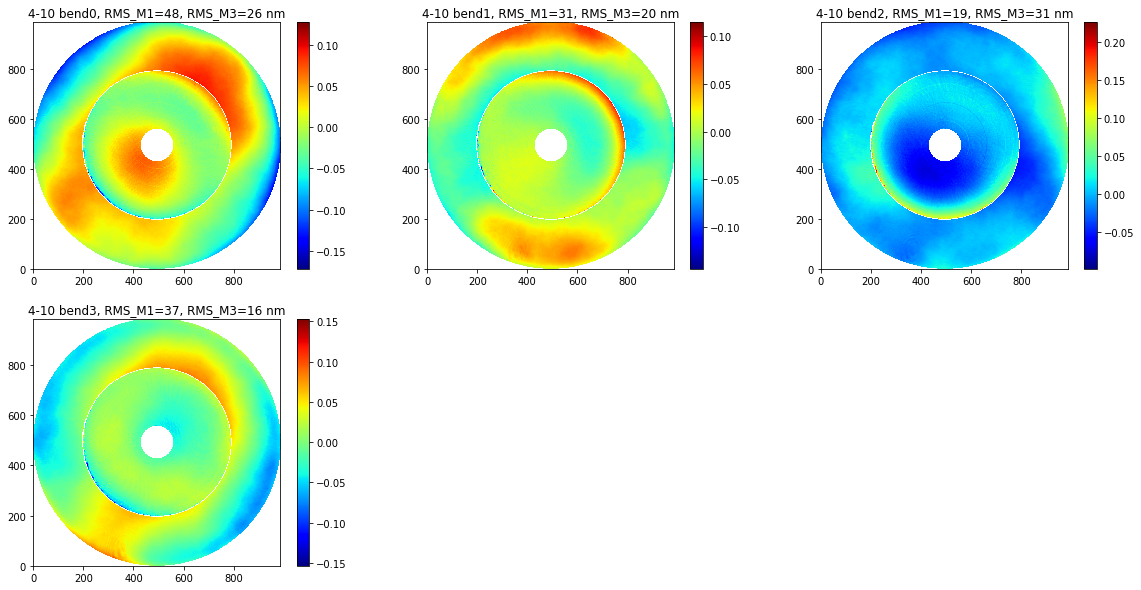

In [12]:
testID = '4-10'
iter = ''
fig, ax = plt.subplots(2,3,figsize=(20,5*2))
i = 0
for bend in range(4):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s/Analysis/Combined M1M3 DiffMap set%d-set%d.h5'%(
        dataDir, dateID, testID, bend, bend+1)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(s, origin='lowerleft')  
        ax[irow][icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[irow][icol])
fig.delaxes(ax.flatten()[-2])    
fig.delaxes(ax.flatten()[-1])    

### Redo horizon optimization using M3 only, with Bo calculating new forces in real time.

5-3 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190221_5-3/M1 set0 190221 5-3.h5: Thu Feb 21 11:38:21 2019 
/Processed/190221_5-3/M3 set0 190221 5-3.h5: Thu Feb 21 11:37:53 2019 
5-3 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190221_5-3/M1 set1 190221 5-3.h5: Thu Feb 21 12:14:15 2019 
/Processed/190221_5-3/M3 set1 190221 5-3.h5: Thu Feb 21 12:11:57 2019 
5-3 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190221_5-3/M1 set2 190221 5-3.h5: Thu Feb 21 12:47:05 2019 
/Processed/190221_5-3/M3 set2 190221 5-3.h5: Thu Feb 21 12:47:50 2019 


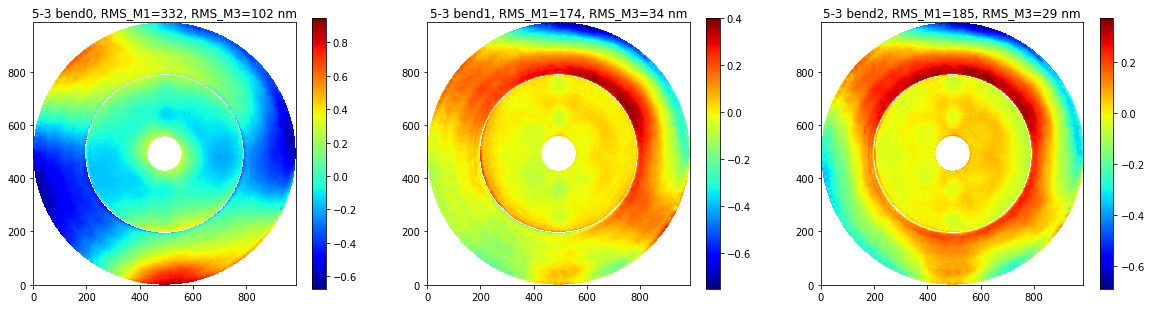

In [2]:
testID = '5-3'
iter = ''
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])

### toward the end of the day, repeat optimization, confirm that we can get back the optimized surface.

5-4 bend4 ------ irow = 0, icol = 0, -----------------------------
/Processed/190221_5-4e/M1 set4 190221 5-4.h5: Thu Feb 21 15:02:30 2019 
/Processed/190221_5-4e/M3 set4 190221 5-4.h5: Thu Feb 21 15:01:36 2019 
5-4 bend5 ------ irow = 0, icol = 1, -----------------------------
/Processed/190221_5-4e/M1 set5 190221 5-4.h5: Thu Feb 21 15:27:59 2019 
/Processed/190221_5-4e/M3 set5 190221 5-4.h5: Thu Feb 21 15:28:46 2019 
5-4 bend6 ------ irow = 0, icol = 2, -----------------------------
/Processed/190221_5-4e/M1 set6 190221 5-4.h5: Thu Feb 21 15:51:04 2019 
/Processed/190221_5-4e/M3 set6 190221 5-4.h5: Thu Feb 21 15:50:37 2019 


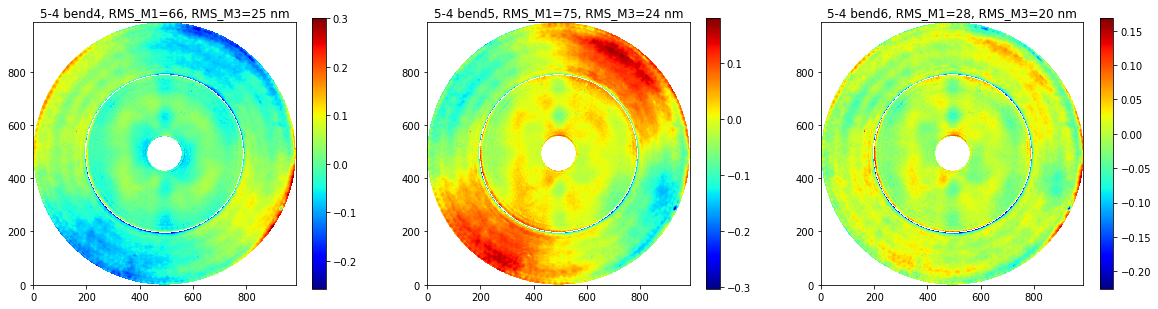

In [7]:
testID = '5-4'
iter = 'e'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(4, 7):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])  
    
print('==============Plot on the right is what we will call fd later===============')

/Users/bxin/largeData/M1M3_ML/Processed/190221_5-4e/M1M3 set4 190221 5-4M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190221_5-4e/M1M3 set5 190221 5-4M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190221_5-4e/M1M3 set6 190221 5-4M1M3 fit mode amps.csv


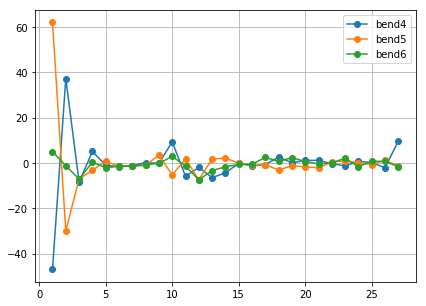

In [18]:
testID = '5-4'
iter = 'e'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(4,7):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 